In [1]:
from RL_cliff.environment import *
from RL_cliff.learning_algorithm import *
import pickle

In [2]:
train = False
load = not True

In [3]:
if train:
    env = Cliff()
    num_avg = 10
    stats = {"SCRN": {}, "SPG": {}}
    for i in range(num_avg):
        print(f"========== TRAINING RUN {i} OUT OF {num_avg} ===========")
        print("********** TRAINING WITH SCRN **********")
        stats_SCRN = discrete_SCRN(env, num_episodes=5000)
        stats["SCRN"].update({i: stats_SCRN})
        print("********** TRAINING WITH SPG ********")
        stats_DPG = discrete_policy_gradient(env, num_episodes=5000)
        stats["SPG"].update({i: stats_DPG})
    average_stats = {"SCRN": {}, "SPG": {}}
    average_stats["SCRN"] = {key: np.mean([stats["SCRN"][i][key] for i in range(num_avg)], axis=0)
                         for key in ["steps", "rewards", "objectives", "gradients", "optimum"]}
    average_stats["SPG"] = {key: np.mean([stats["SPG"][i][key] for i in range(num_avg)], axis=0)
                         for key in ["steps", "rewards", "objectives", "gradients", "optimum"]} 
    with open("results.pkl", "wb") as handle:
        pickle.dump(average_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open("results.pkl", "rb") as f:
        average_stats = pickle.load(f)

In [23]:
show_SCRN = True
show_SPG = True
zoom_on_first = 1000

<Figure size 640x480 with 0 Axes>

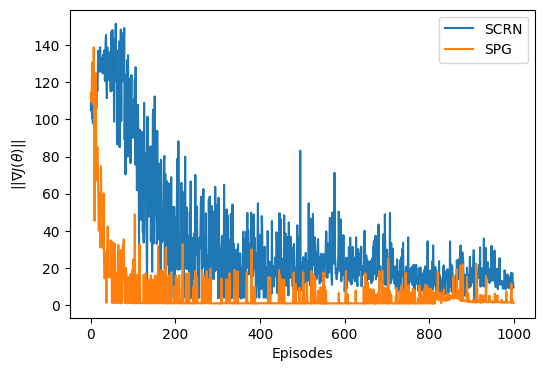

In [24]:
plt.rcParams.update(plt.rcParamsDefault)
plt.figure()
plt.figure(figsize=(6, 4))
if show_SCRN:
    plt.plot(average_stats["SCRN"]["gradients"][:zoom_on_first], label="SCRN")
if show_SPG:
    plt.plot(average_stats["SPG"]["gradients"][:zoom_on_first], label="SPG")
plt.ylabel(r"$\vert \vert \nabla J(\theta) \vert \vert$")
plt.xlabel("Episodes")
plt.legend(loc="best")
plt.show()

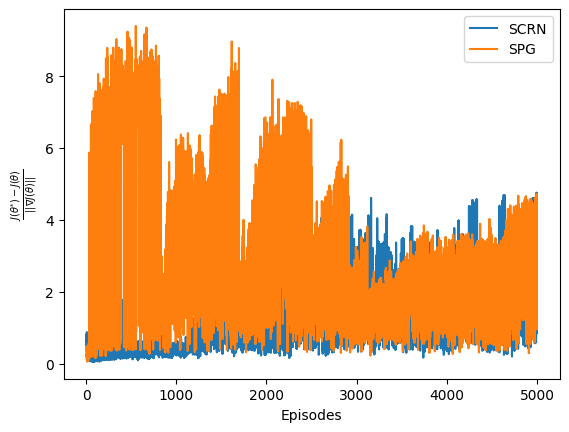

In [14]:
plt.figure()
if show_SCRN:
    plt.plot((average_stats["SCRN"]["optimum"]-average_stats["SCRN"]["objectives"])/average_stats["SCRN"]["gradients"], label="SCRN")
if show_SPG:
    plt.plot((average_stats["SPG"]["optimum"]-average_stats["SPG"]["objectives"])/average_stats["SPG"]["gradients"], label="SPG")
plt.legend(loc="best")
plt.xlabel("Episodes")
plt.ylabel(r"$\frac{J(\theta^{*}) - J(\theta)}{\vert \vert \nabla J(\theta) \vert \vert}$")
plt.show()

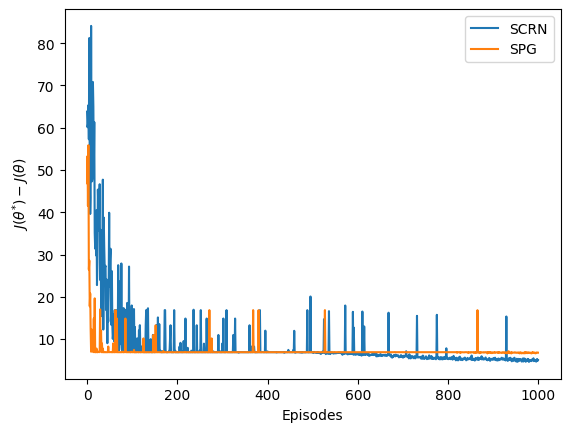

In [25]:
plt.figure()
if show_SCRN:
    plt.plot(average_stats["SCRN"]["optimum"] - average_stats["SCRN"]["objectives"][:zoom_on_first], label="SCRN")
if show_SPG:
    plt.plot(average_stats["SPG"]["optimum"] - average_stats["SPG"]["objectives"][:zoom_on_first], label="SPG")
plt.legend(loc="best")
plt.xlabel("Episodes")
plt.ylabel(r"$J(\theta^{*}) - J(\theta)$")
plt.show()

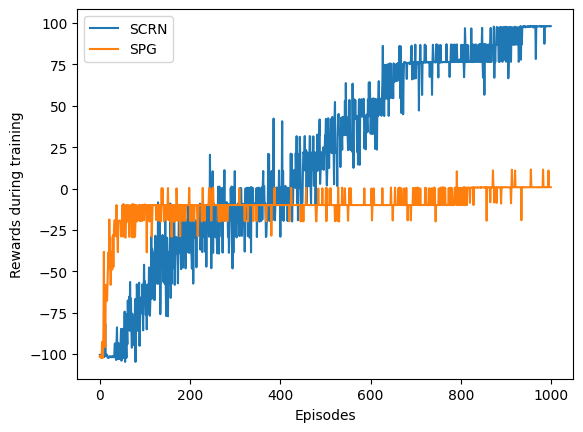

In [26]:
plt.figure()
if show_SCRN:
    plt.plot(average_stats["SCRN"]["rewards"][:zoom_on_first], label="SCRN")
if show_SPG:
    plt.plot(average_stats["SPG"]["rewards"][:zoom_on_first], label="SPG")
plt.legend(loc="best")
plt.xlabel("Episodes")
plt.ylabel("Rewards during training")
plt.show()